An object of class Seurat 
21780 features across 7947 samples within 1 assay 
Active assay: RNA (21780 features, 0 variable features)

Centering and scaling data matrix

PC_ 1 
Positive:  UBE2C, CENPF, TPX2, TOP2A, CKS2, MKI67, AURKA, CCNB1, DLGAP5, PLK1 
	   KPNA2, HMMR, SGO2, UBE2S, CDK1, CENPA, DEPDC1, NUSAP1, ASPM, HMGB2 
	   KIF23, HJURP, KIF2C, AURKB, BUB3, CDCA3, TACC3, GTSE1, FAM83D, CDC20 
Negative:  AC106864.1, MCM5, AC009446.1, SLIRP, MCM6, UNG, GABPB1-AS1, E2F1, UGP2, LINC00678 
	   GINS2, DTL, ATP5F1E, CDC6, RASL11B, EIF4EBP1, PLA2G16, MCM4, AL117378.1, APELA 
	   SYT6, DUT, DHFR, MT1X, PFN1, FEN1, CDT1, MT-ND3, S100A11, MT-CO3 
PC_ 2 
Positive:  UTF1, IRX2, MDK, PDGFA, ACTG1, TMSB4X, NMU, SIX3, NEFL, RGS14 
	   KRT18, PRAC1, KRT8, SORBS2, CARHSP1, COL6A1, MALAT1, PRAC2, C5orf38, MT2A 
	   BARX1, GBX2, SEMA6A, IRX1, NNAT, LINC01896, CCND1, CDKN1C, PPP1R1B, TKT 
Negative:  S100A11, BEX1, ATP5F1E, PLA2G4C, PCLAF, SFRP1, BEX3, MYL9, BST2, RAB17 
	   TIMP1, CYBA, RPL22L1, H2AFZ, HMGN3, BEX2, BASP1, MT-ATP6, AC106864.1, PKIB 
	   USP44, NUCKS1, TAGLN, MFGE8, NFE2L3, HNRNPA2B1, LITAF, FZD7, MT-CO3, MYL6 
PC_ 3 

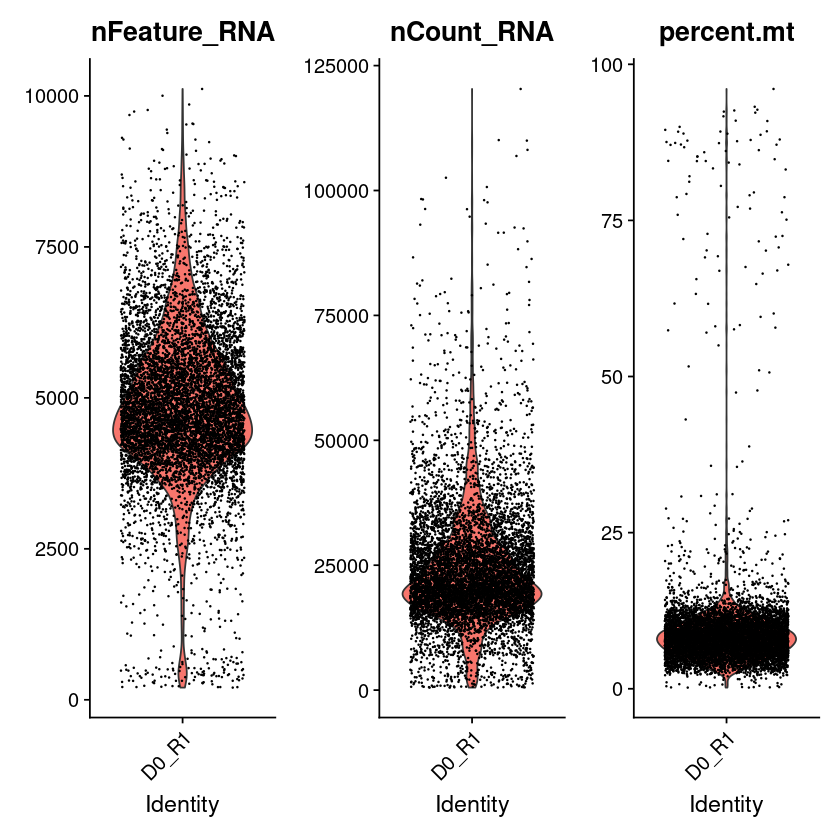

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 7652
Number of edges: 287418

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8378
Number of communities: 9
Elapsed time: 1 seconds


23:35:36 UMAP embedding parameters a = 0.9922 b = 1.112

23:35:36 Read 7652 rows and found 30 numeric columns

23:35:36 Using Annoy for neighbor search, n_neighbors = 30

23:35:36 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

23:35:37 Writing NN index file to temp file /tmp/Rtmp8PjdEb/file4a92e5803b8

23:35:37 Searching Annoy index using 1 thread, search_k = 3000

23:35:39 Annoy recall = 100%

23:35:39 Commencing smooth kNN distance calibration using 1 thread

23:35:40 Initializing from normalized Laplacian + noise

23:35:40 Commencing optimization for 500 epochs, with 317526 positive edges

23:35:49 Optimization finished



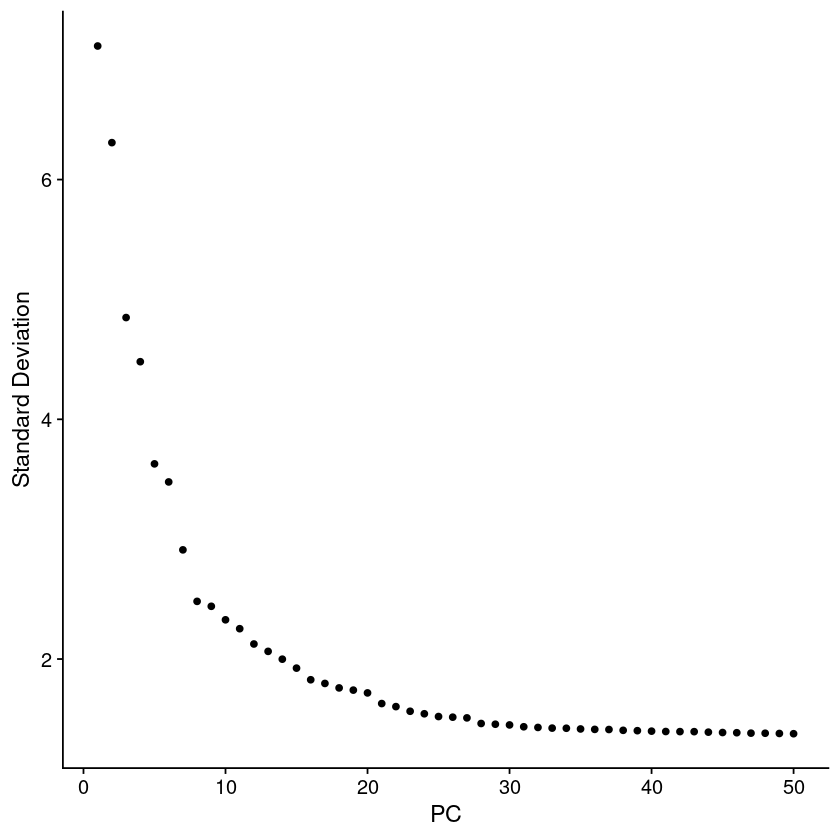

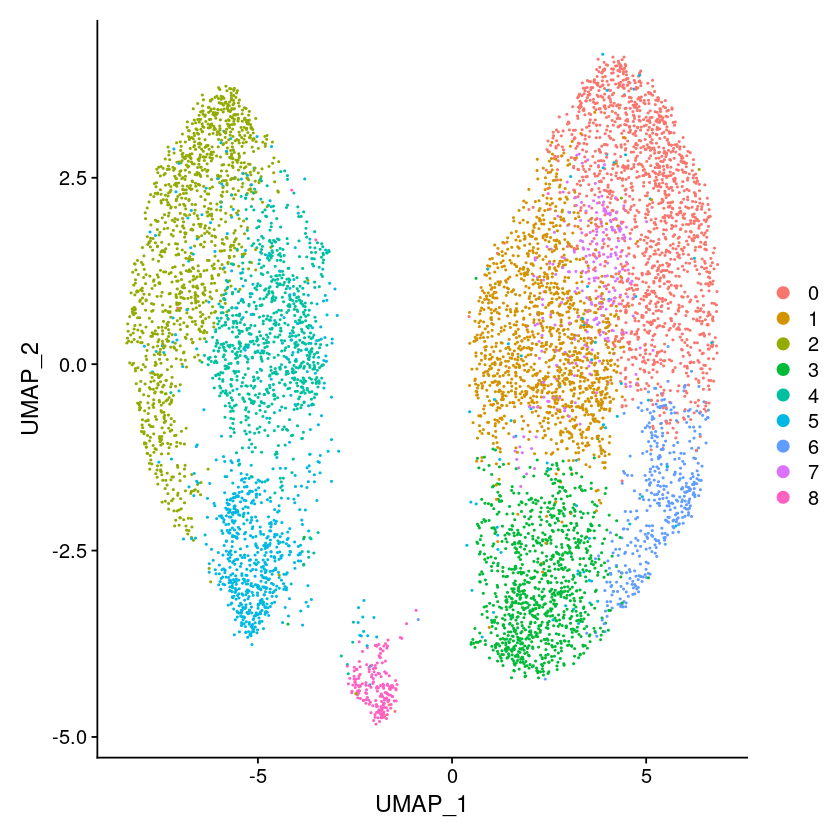

In [2]:
library(dplyr)
library(Seurat)
library(patchwork)

# importing data 
D0_R1.data <- Read10X(data.dir = "/volume/DAY_0/D0_R1")
D0_R1 <- CreateSeuratObject(counts = D0_R1.data, project = "D0_R1", min.cells = 3, min.features = 200)
D0_R1

# Violin Plot
D0_R1[["percent.mt"]] <- PercentageFeatureSet(D0_R1, pattern = "^MT-")

VlnPlot(D0_R1, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)

D0_R1 <- subset(D0_R1, subset = nFeature_RNA > 2000 & nFeature_RNA < 8750 & percent.mt < 20)

# Elbow Plot
D0_R1 <- NormalizeData(D0_R1)

all.genes <- rownames(D0_R1)
D0_R1 <- ScaleData(D0_R1, features = all.genes)

D0_R1 <- FindVariableFeatures(D0_R1, selection.method = "vst", nfeatures = 2000)
D0_R1 <- RunPCA(D0_R1, features = VariableFeatures(object = D0_R1))

ElbowPlot(D0_R1, ndims = 50)

# UMAP
D0_R1 <- FindNeighbors(D0_R1, dims = 1:30)
D0_R1 <- FindClusters(D0_R1, resolution = 0.5)

D0_R1 <- RunUMAP(D0_R1, dims = 1:30)
DimPlot(D0_R1, reduction = "umap")

# SAVE
saveRDS(D0_R1, file = "/volume/DAY_0/D0_R1/D0_R1_final.rds")